<br><br><br><br><br><br>
# Python Decision Data Social Network Ads
***


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Load data

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


###### Merubah variabel gender menjadi variabel dummy

In [5]:
data.drop(["User ID"],axis=1,inplace=True)
data.Gender=[1 if each== "Female" else 0 for each in data.Gender]
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


### Define X dan Y

In [6]:
X = data.iloc[:,0:3]

In [7]:
Y = data.iloc[:,-1]

In [8]:
# Normalization
x=(X-np.min(X))/(np.max(X)-np.min(X)).values

C:\ProgramData\Anaconda3\envs\belajar_ai\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\envs\belajar_ai\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


### Split Train Test

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=123)

In [10]:
X_train.shape

(320, 3)

In [11]:
X_test.shape

(80, 3)

In [12]:
data.shape

(400, 4)

In [13]:
X_train.head(n=5)

,Gender,Age,EstimatedSalary
178,0,24,23000
252,1,48,134000
6,1,27,84000
274,1,57,26000
125,1,39,61000


### Modelling (Decision Tree)

In [14]:
model = DecisionTreeClassifier(max_depth=5)

In [15]:
# Train Model menggunakan data train
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [16]:
pred_train = model.predict(X_train)

In [17]:
df_hasil_train = pd.DataFrame({'y_actual':Y_train,
                               'y_pred':pred_train})
df_hasil_train

,y_actual,y_pred
178,0,0
252,1,1
6,0,0
274,1,1
125,0,0
...,...,...
230,1,1
98,0,0
322,0,0
382,1,0


In [18]:
pred_test = model.predict(X_test)

In [19]:
df_hasil_test = pd.DataFrame({'y_actual':Y_test,
                               'y_pred':pred_test})
df_hasil_test

,y_actual,y_pred
234,0,1
42,0,1
303,1,0
155,0,0
342,0,0
...,...,...
179,0,0
202,1,1
323,1,1
114,0,0


### Evaluasi

#### Train

In [20]:
print(classification_report(Y_train,pred_train)) # y_actual, y_pred

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       207
           1       0.95      0.92      0.93       113

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320



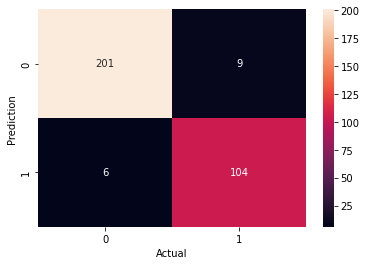

In [21]:
cm = confusion_matrix(Y_train,pred_train)
sns.heatmap(cm.T, annot=True, fmt='d')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

#### Test

In [22]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.81      0.87      0.84        30

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.87        80
weighted avg       0.88      0.88      0.88        80



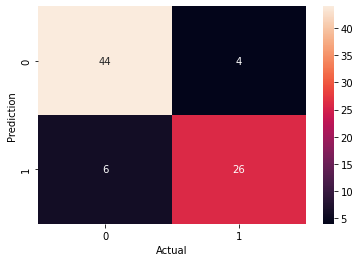

In [23]:
cm = confusion_matrix(Y_test,pred_test)
sns.heatmap(cm.T, annot=True, fmt='d')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

### Plot Tree

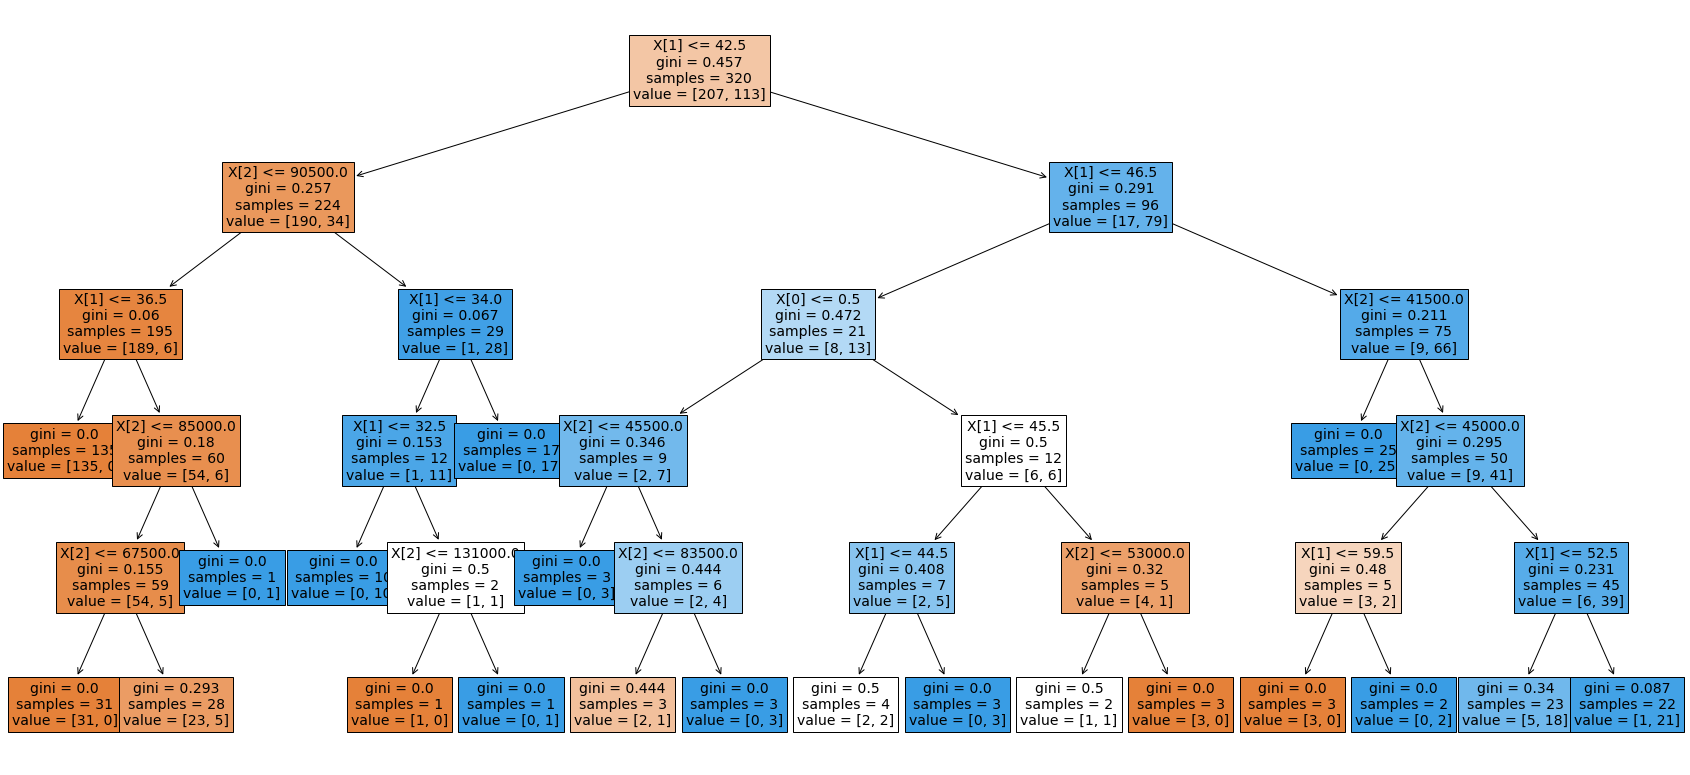

In [24]:
from sklearn import tree

plt.figure(figsize=(30,14))
tree.plot_tree(model, filled=True, fontsize=14)
plt.show()